<a href="https://colab.research.google.com/github/mohaktiwari/MarvelTasks/blob/main/LinearRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class LinearRegression:

    def __init__(self, lr, n_iters):
        #Intialising the learning rate(lr) and number of iteration(n_inter) values
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        #Intialising the weights and the bias values
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            #Finding the dervatives(gradients) of the Mean Squared Error
            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            #Updating the weights and bias values
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        #Finding the prediction values for the given dataset
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

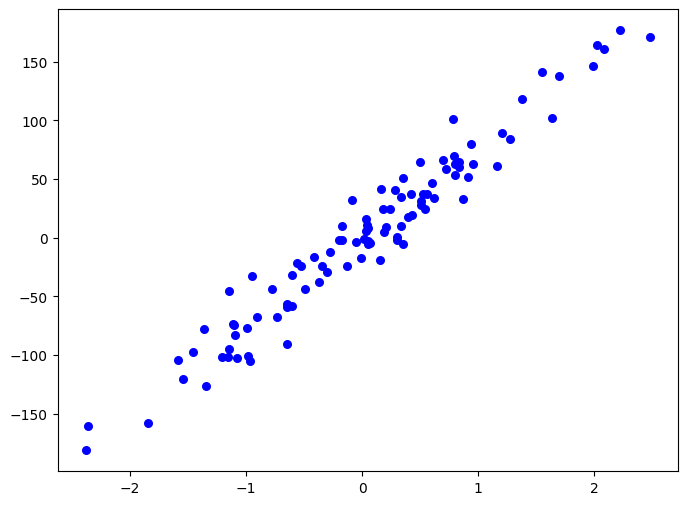


The Mean Squared Error is: 305.7719958301902 



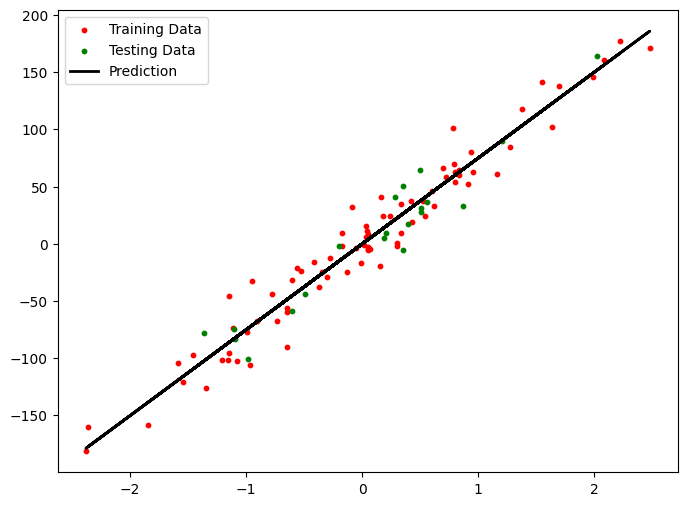

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

#Creating a random regression problem
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#Displaying the regression problem
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

#Creating a model
reg = LinearRegression(lr=0.01,n_iters=1000)

#Fitting the training data
reg.fit(X_train,y_train)
#Forming predictions
predictions = reg.predict(X_test)

#Calculating the Mean Squared Error
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print("\nThe Mean Squared Error is:",mse,"\n")

#Forming Prediction line
y_pred_line = reg.predict(X)
fig = plt.figure(figsize=(8,6))
#Plotting Training values
m1 = plt.scatter(X_train, y_train, color="red", s=10,label="Training Data")
#Plotting Testing values
m2 = plt.scatter(X_test, y_test, color="green", s=10,label="Testing Data")
#Plotting the prediction line
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.legend()
plt.show()